# SPOTIFY MUSIC ANALYSIS

## OVERVIEW

 To add later

## GOALS
`1. Identify top music genres and artists.`

`2. Analyze the association between music attributes and popularity.`

`3. To add along`

## DATA

### Data Source

The dataset used in this analysis was obtained from [Kaggle](https://www.kaggle.com) and contains a collection of Spotify tracks along with their metadata and audio features. It includes attributes such as track name, artist, genre, popularity score, and various musical characteristics like danceability, energy, valence, and tempo. This data provides a useful foundation for exploring listening trends, audio feature distributions, and artist or genre-based insights.

### Data Description

##### Importing the data

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the data
df = pd.read_csv('./data/spotify.csv')
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


##### Basic Structure

In [3]:
df.shape

(114000, 20)

In [4]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

##### Column types and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

##### Summary statistics numerical

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


##### Summary statistics categorical

In [7]:
df.describe(include='O').T

,count,unique,top,freq
track_id,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46579,Alternative Christmas 2022,195
track_name,113999,73602,Run Rudolph Run,151
track_genre,114000,114,singer-songwriter,1000


##### Duplicates

In [8]:
df.duplicated().sum()

450

### Data Summary

The Spotify dataset consists of **114,000** records and **20** attributes, capturing both metadata and audio features for a wide variety of tracks. It includes **14** numerical attributes, **5** categorical attributes, and **1** boolean attribute (`explicit`). The dataset is nearly complete, with only minimal missing values in the `artists`, `album_name`, and `track_name` columns—each missing just one entry. There are 450 duplicate rows, which may need to be addressed during data cleaning. Overall, the dataset provides a vast number of observations which will aid in exploring patterns in music characteristics, artist trends, and genre-based insights.


### Data Cleaning

In [9]:
#checking Columns
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

The column names are okay, no need for standardization or removing empty spaces

In [10]:
#printing unique values in each column
for col in df.columns:
    print(f"{col}:\n")
    print(df[col].unique())
    print("**************")

track_id:

['5SuOikwiRyPMVoIQDJUgSV' '4qPNDBW1i3p13qLCt0Ki3A'
 '1iJBSr7s7jYXzM8EGcbK5b' ... '6x8ZfSoqDjuNa5SVP5QjvX'
 '2e6sXL2bYv4bSz6VTdnfLs' '2hETkH7cOfqmz3LqZDHZf5']
**************
artists:

['Gen Hoshino' 'Ben Woodward' 'Ingrid Michaelson;ZAYN' ...
 'Cuencos Tibetanos Sonidos Relajantes'
 'Bryan & Katie Torwalt;Brock Human' 'Jesus Culture']
**************
album_name:

['Comedy' 'Ghost (Acoustic)' 'To Begin Again' ...
 '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente'
 'Frecuencias Álmicas en 432hz (Solo Piano)' 'Revelation Songs']
**************
track_name:

['Comedy' 'Ghost - Acoustic' 'To Begin Again' ... 'Water Into Light'
 'Miss Perfumado' 'Barbincor']
**************
popularity:

[ 73  55  57  71  82  58  74  80  56  69  52  62  54  68  67  75  63  70
   0   1  46  61  60  51  66  64  65  44  45  50  59  49  53  47  43  42
  20  22  35  19  24  18  23  40  38  41  30  37  39  48  36  34  26  32
  33  21  31  28  29  27  25  16   3  

In [11]:
df['artists'].value_counts()

The Beatles                                                  279
George Jones                                                 271
Stevie Wonder                                                236
Linkin Park                                                  224
Ella Fitzgerald                                              222
                                                            ... 
Macaco                                                         1
Wisp                                                           1
Vidyasagar;S. P. Balasubrahmanyam;S. Janaki                    1
Scott Hamilton;Hans Backenroth;Kristian Leth;Jan Lundgren      1
Gelena Velikanova;Квинтет п/у Виктора Миронова                 1
Name: artists, Length: 31437, dtype: int64

In [12]:
df['album_name'].value_counts()

Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
Seu Jeito, Meu Jeito             1
Totoro Talk (To Me)              1
Bird EP                          1
Hip Hop Sux!                     1
Patek (Remix)                    1
Name: album_name, Length: 46579, dtype: int64

In [13]:
df['track_name'].value_counts()

Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
                                 ... 
Sonate, Op. 5: I. Adagio            1
Сны моряка                          1
Niebo jak sen                       1
Down the Road                       1
Ich bin voll                        1
Name: track_name, Length: 73602, dtype: int64

In [14]:
# standardizing artists, album_name and track name
df['artists'] = df['artists'].str.strip().str.lower()
df['album_name'] = df['album_name'].str.strip().str.lower()
df['track_name'] = df['track_name'].str.strip().str.lower()

In [15]:
df['album_name'].value_counts()

alternative christmas 2022                       195
feliz cumpleaños con perreo                      184
metal                                            143
halloween con perreito                           123
halloween party 2022                             115
                                                ... 
balance presents do not sleep (mixed version)      1
cleanse fold and manipulate                        1
kramgoa låtar 15                                   1
искренний                                          1
tera hua na mai kabhi vip                          1
Name: album_name, Length: 46145, dtype: int64

In [16]:
df['track_name'].value_counts()

run rudolph run                                      151
halloween                                             88
frosty the snowman                                    84
little saint nick - 1991 remix                        76
last last                                             75
                                                    ... 
sad bitch bad bitch                                    1
fingerprint                                            1
the me inside of me                                    1
one more light - steve aoki chester forever remix      1
i am you                                               1
Name: track_name, Length: 72391, dtype: int64

In [17]:
#Checking null proportion
df.isnull().mean()*100

track_id            0.000000
artists             0.000877
album_name          0.000877
track_name          0.000877
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
track_genre         0.000000
dtype: float64

**Since less than 0.001% of the data is null, we can drop this row.**


In [18]:
#Dropping null row
df.dropna(subset=['artists','album_name','track_name'], inplace=True)
df.isnull().mean()*100

track_id            0.0
artists             0.0
album_name          0.0
track_name          0.0
popularity          0.0
duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
track_genre         0.0
dtype: float64

In [19]:
##### Checking for and dropping duplicates
df.duplicated().sum()

450

In [20]:
df.shape

(113999, 20)

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [22]:
df.shape

(113549, 20)

### Checking for Outliers

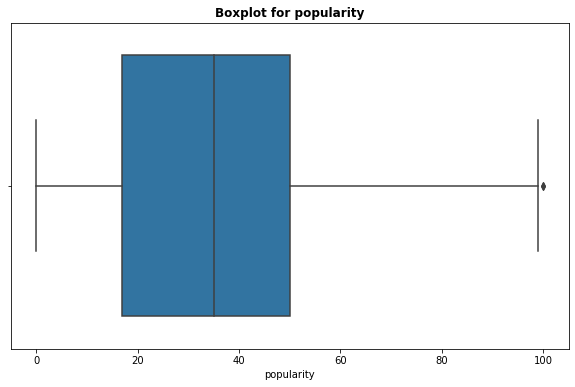

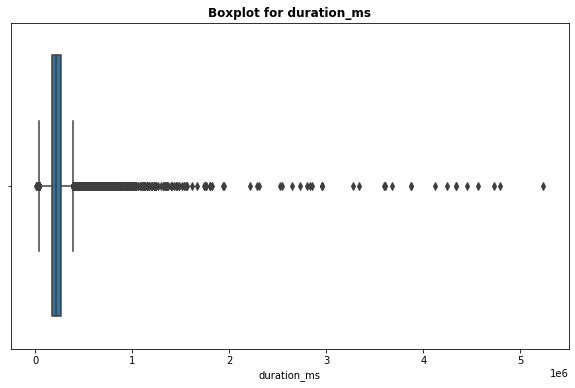

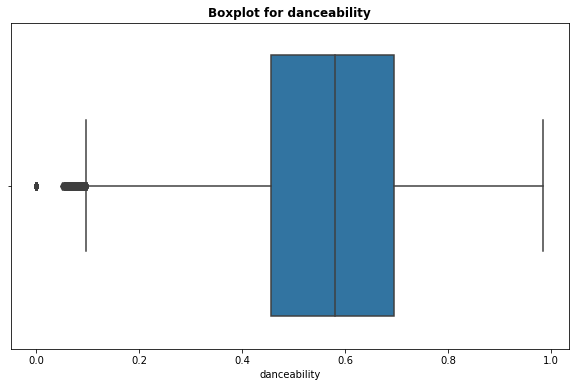

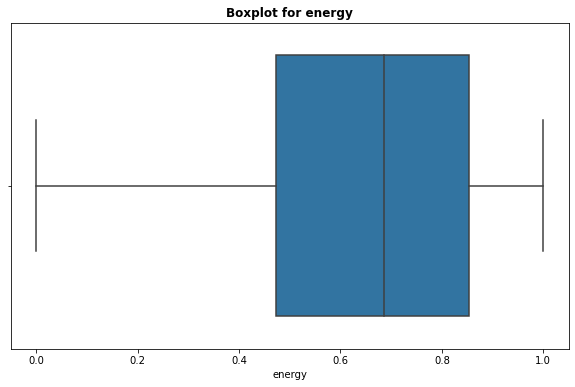

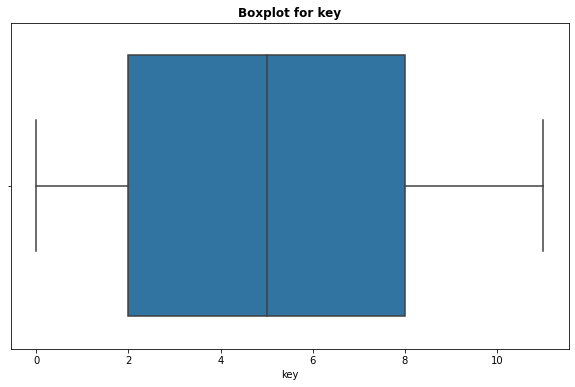

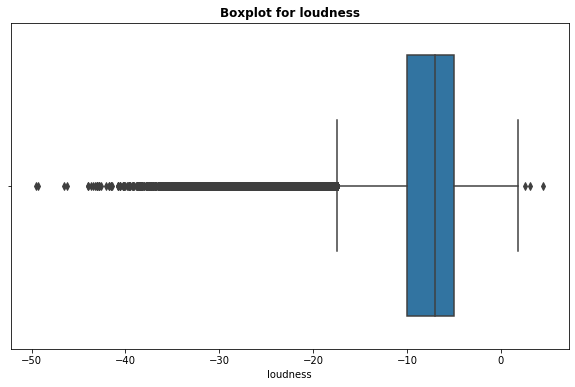

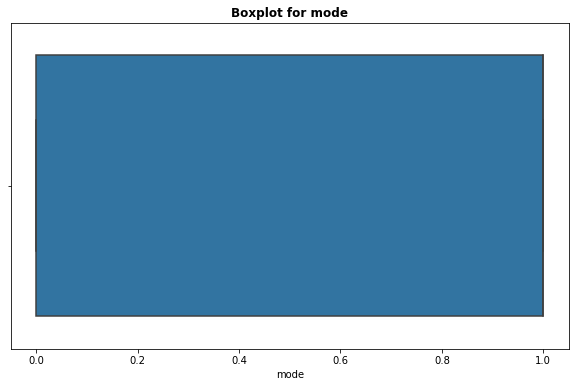

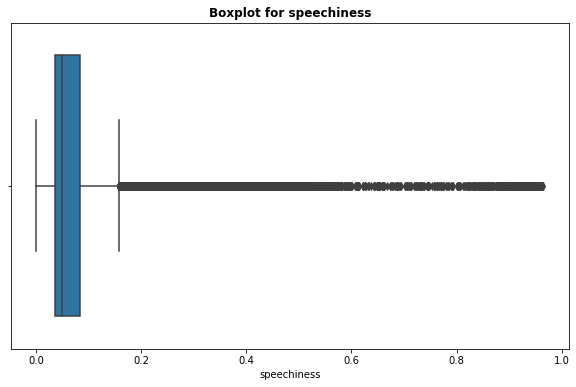

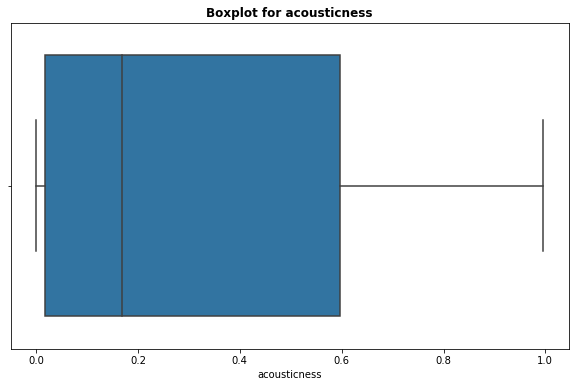

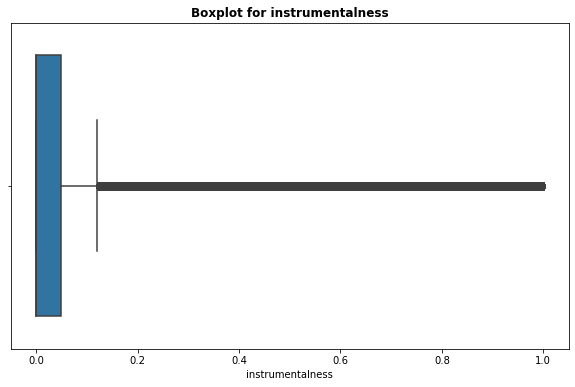

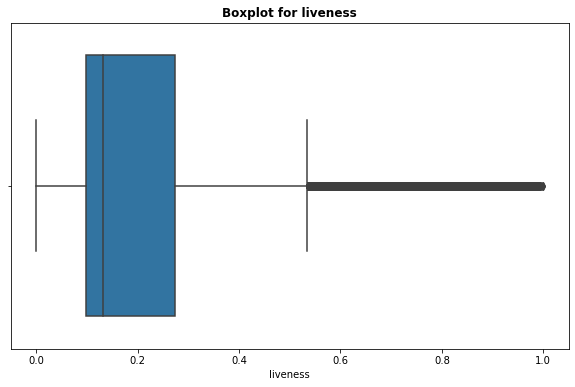

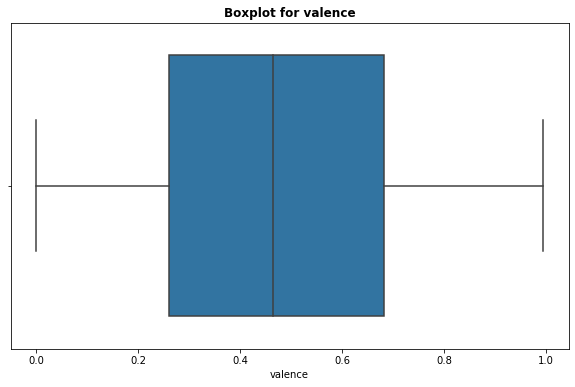

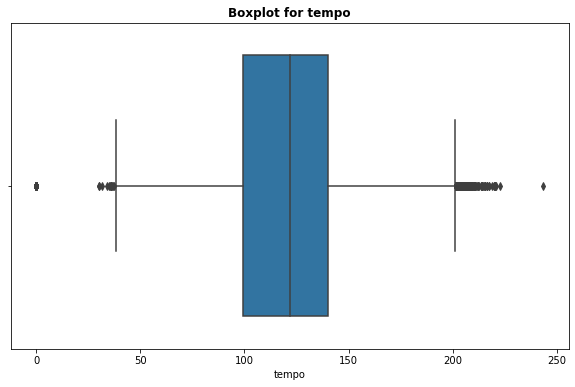

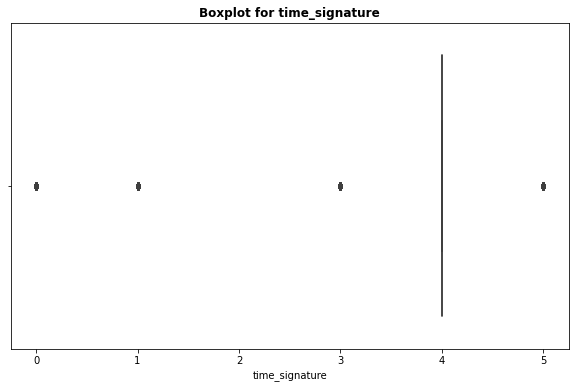

In [23]:
#Creating a list of numeric columns and looping through it
numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}', fontweight='bold')
    plt.xlabel(col)
    plt.show

#### Should We Remove Outliers?

Since we are focusing on Exploratory Data Analysis (EDA) phase, the goal is to understand the data rather than clean it prematurely. Outliers often carry meaningful information that help us uncover patterns, special cases, or data quality issues. They may represent unique tracks, rare genres, unusually long or short durations, or highly rated rare niche.


### Feature Engineering

In [24]:
# Time is in milliseconds, let us create a new column minutes
df['duration_min'] = (df['duration_ms']/60000).round(3)

In [25]:
df['duration_min'].unique()

array([3.844, 2.494, 3.514, ..., 8.222, 6.295, 7.707])

In [26]:
# classifying track length into Short, Long and Medium
def classify_track(duration):
 if duration <2:
    return 'Short'
 elif duration >5:
    return 'Long'
 else:
    return 'Medium'

df['track_length'] = df['duration_min'].apply(classify_track)
df['track_length'].value_counts()

Medium    91098
Long      16279
Short      6172
Name: track_length, dtype: int64

In [27]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'track_length'],
      dtype='object')

### Exporting Cleaned Data

In [28]:
### Exporting the cleaned data for Tableau
df.to_csv('data/cleaned_spotify.csv', index=False)
data= pd.read_csv('data/cleaned_spotify.csv')
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,track_length
0,5SuOikwiRyPMVoIQDJUgSV,gen hoshino,comedy,comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844,Medium
1,4qPNDBW1i3p13qLCt0Ki3A,ben woodward,ghost (acoustic),ghost - acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.494,Medium
2,1iJBSr7s7jYXzM8EGcbK5b,ingrid michaelson;zayn,to begin again,to begin again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.514,Medium
3,6lfxq3CG4xtTiEg7opyCyx,kina grannis,crazy rich asians (original motion picture sou...,can't help falling in love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.366,Medium
4,5vjLSffimiIP26QG5WcN2K,chord overstreet,hold on,hold on,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314,Medium


We do Univariate, Bivariate and Multivariate

### EXPLORATORY DATA ANALYSIS

#### Univariate

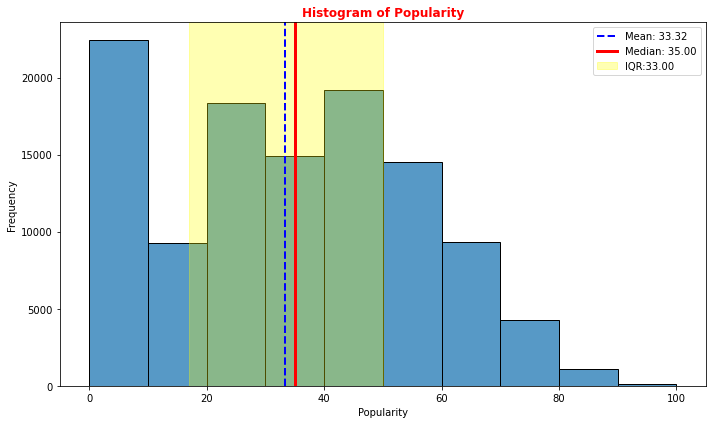

In [33]:
# Calculating statistics
mean_val = data['popularity'].mean()
median_val = data['popularity'].median()
q1 = data['popularity'].quantile(0.25)
q3 = data['popularity'].quantile(0.75)
iqr = q3 - q1

#plotting histogram
plt.figure(figsize=(10,6))
sns.histplot(data['popularity'], bins=10, kde=False)

#adding vertical lines for mean, median and IQR
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='red', linestyle='-', linewidth=3, label=f'Median: {median_val:.2f}')
plt.axvspan(q1,q3, color='yellow', alpha=0.3, label=f'IQR:{iqr:.2f}')

# Titles and labels
plt.title('Histogram of Popularity', fontweight='bold', color='red')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
cols_to_plot = ['tempo', 'valence', 'energy']

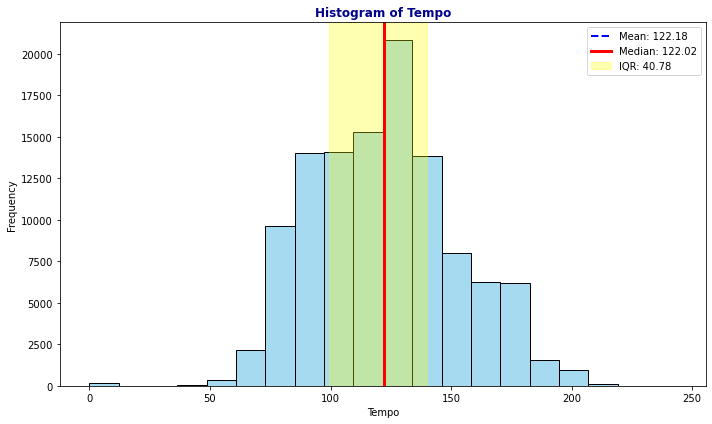

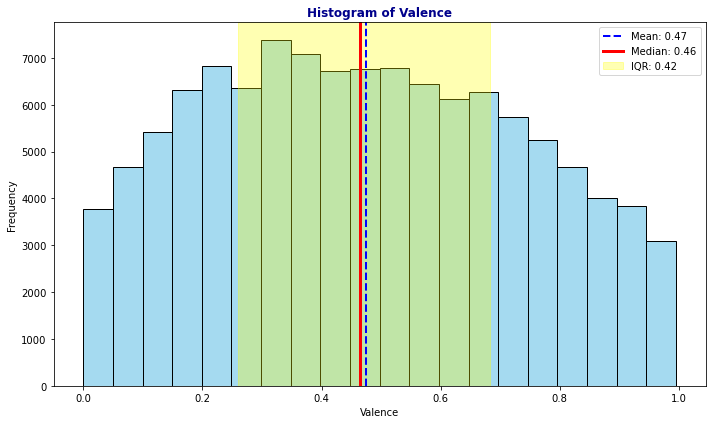

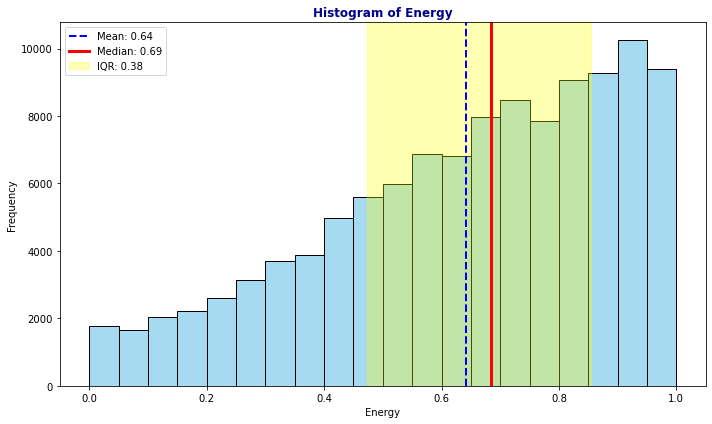

In [40]:
#plotting each item
for col in cols_to_plot:
    #calculating statistics
    col_mean = data[col].mean()
    col_median = data[col].median()
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    
    #plotting the histogram
    plt.figure(figsize=(10,6))
    sns.histplot(data[col], bins=20, kde=False, color='skyblue')
    
    #adding vertical lines for mean, median and IQR
    plt.axvline(col_mean, color='blue', linestyle='--', linewidth='2', label=f'Mean: {col_mean:.2f}')
    plt.axvline(col_median, color='red', linestyle ='-', linewidth='3', label=f'Median: {col_median:.2f}')
    plt.axvspan(q1,q3, color='yellow', alpha=0.3, label=f'IQR: {iqr:.2f}')
    
    #Title and labels
    plt.title(f'Histogram of {col.capitalize()}', fontweight='bold', color='darkblue')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()   

In [41]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'track_length'],
      dtype='object')

#### Barplot of Top 10 Genres by Average Valence

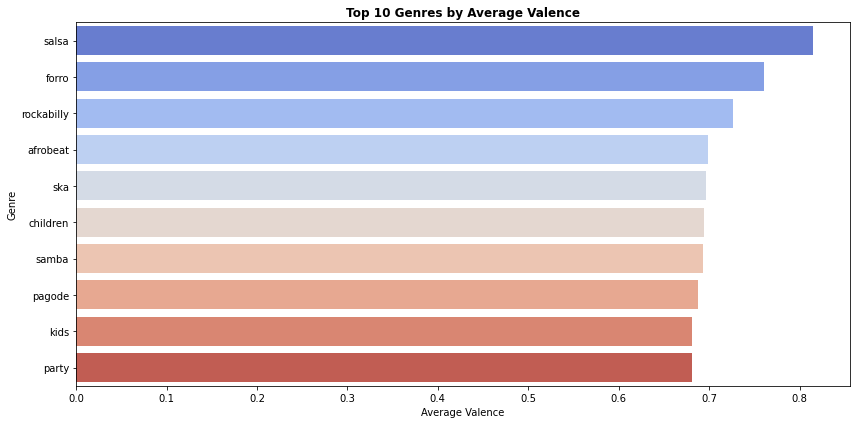

In [52]:
#Creating a dataframe and series
genre_stats = data.groupby('track_genre')[['valence', 'energy', 'danceability']].mean()
top_valence = genre_stats['valence'].sort_values(ascending=False).head(10)

#Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=top_valence.values, y=top_valence.index, palette='coolwarm')

#Title and Labels
plt.title('Top 10 Genres by Average Valence', fontweight='bold')
plt.xlabel('Average Valence')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


#### Barplot of Top 10 Genres by Average Energy

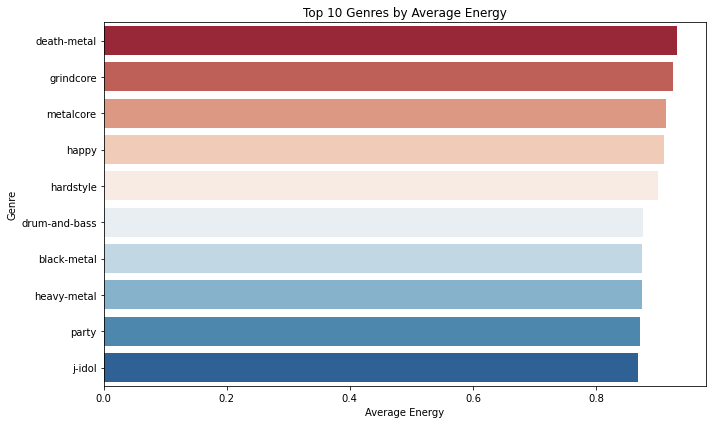

In [66]:
#Creating a series
top_energy = genre_stats['energy'].sort_values(ascending=False).head(10)

#Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_energy.values, y=top_energy.index, palette='RdBu')

#Title and Labels
plt.title('Top 10 Genres by Average Energy')
plt.xlabel('Average Energy')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#### Barplot of Top 10 Genres by Average Danceability

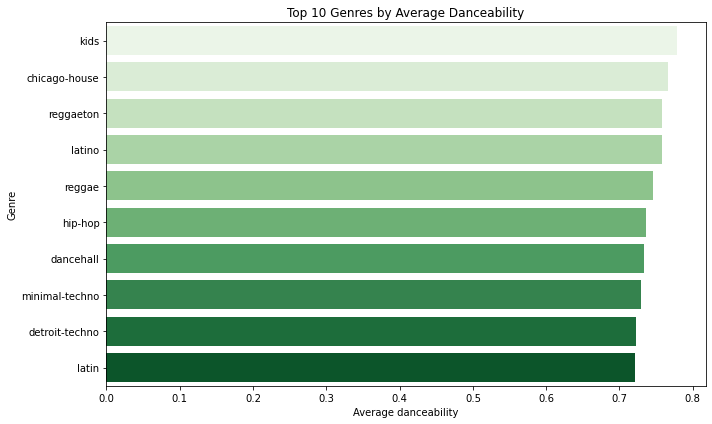

In [67]:
#Creating a series of top 10 danceable
top_dance = genre_stats['danceability'].sort_values(ascending=False).head(10)

#plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_dance.values, y=top_dance.index, palette='Greens')

#Title and Labels
plt.title('Top 10 Genres by Average Danceability')
plt.xlabel('Average danceability')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [55]:
# plt.figure(figsize=(12,10))
# sns.heatmap(genre_stats.head(20), cmap='YlGnBu', annot=True, fmt=".2f")
# plt.title('Average Audio Features per Genre', fontsize=14, fontweight='bold')
# plt.tight_layout()
# plt.show()


In [57]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'track_length'],
      dtype='object')

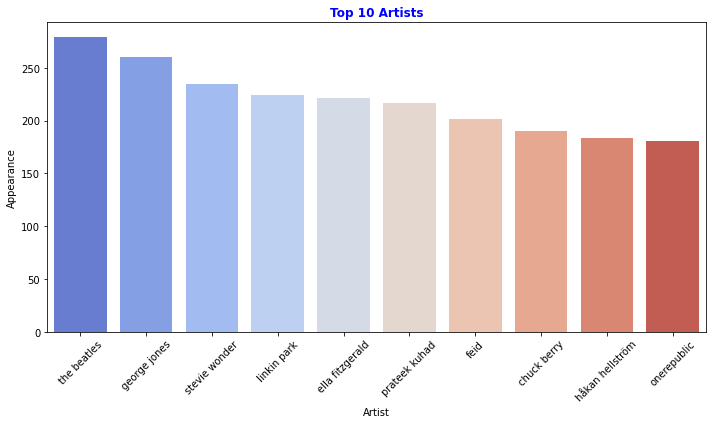

In [73]:
#Creating a series of the top 10 popular artists
top_artists = data['artists'].value_counts().head(10)

#plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='coolwarm')

#title and labels
plt.title('Top 10 Artists', color='blue', fontweight='bold')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.ylabel('Appearance')
plt.tight_layout()
plt.show()